# CS 4661   |    Subject: RED WINE QUALITY DATASET ANALYSIS    |   Fall 2018     

## Smitkumar Patel  (CIN: 306587208)
## Ravi Amin
## Kruti Shah
## Rutviben Patel
## Riddhiben Patel  (CIN: 306612701)

### Data set link : https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009  

In [69]:
import numpy as np
import pandas as pd

from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
from bokeh.layouts import row
from bokeh.io import output_notebook
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices


import sklearn
import sklearn.metrics

from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import ensemble
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('always')

output_notebook()
%matplotlib inline

Loading BokehJS ...

## Step 1: Data Reading


- Here, we can use the *read_csv()* from the *pandas* library to load data into dataframe from the remote url.
- View the first five rows using head() function

In [70]:
wine=pd.read_csv(r'S:\MASTERS\SEMESTER_4\CS_4661\Project\winequality-red.csv')

In [71]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


> ### Coloumn Information

- Fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- Volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- Citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
- Residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- Chlorides: the amount of salt in the wine
- Free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; - it prevents microbial growth and the oxidation of wine
- Total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at - free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- Density: the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- Sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- Alcohol: the percent alcohol content of the wine
- Quality: output variable (based on sensory data, score between 0 and 10)

## Step 2: Data Exploration


In [72]:
print("Shape of Red Wine dataset: ", wine.shape)
print('\n')
print("List of columns: ", list(wine))

Shape of Red Wine dataset:  (1599, 12)


List of columns:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


-  total 1599 observations with 12 different feature variables/attributes
-  all 12 columns are of numeric data types. Out of 12 variables, 11 are predictor variables and last one 'quality' is an response variable.

> ### Checking the null/missing value in the Dataset

In [73]:
import missingno as msno
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- This function count the colums which contain null value but here it seems like Data is pre processed and clened with dummy and null values.

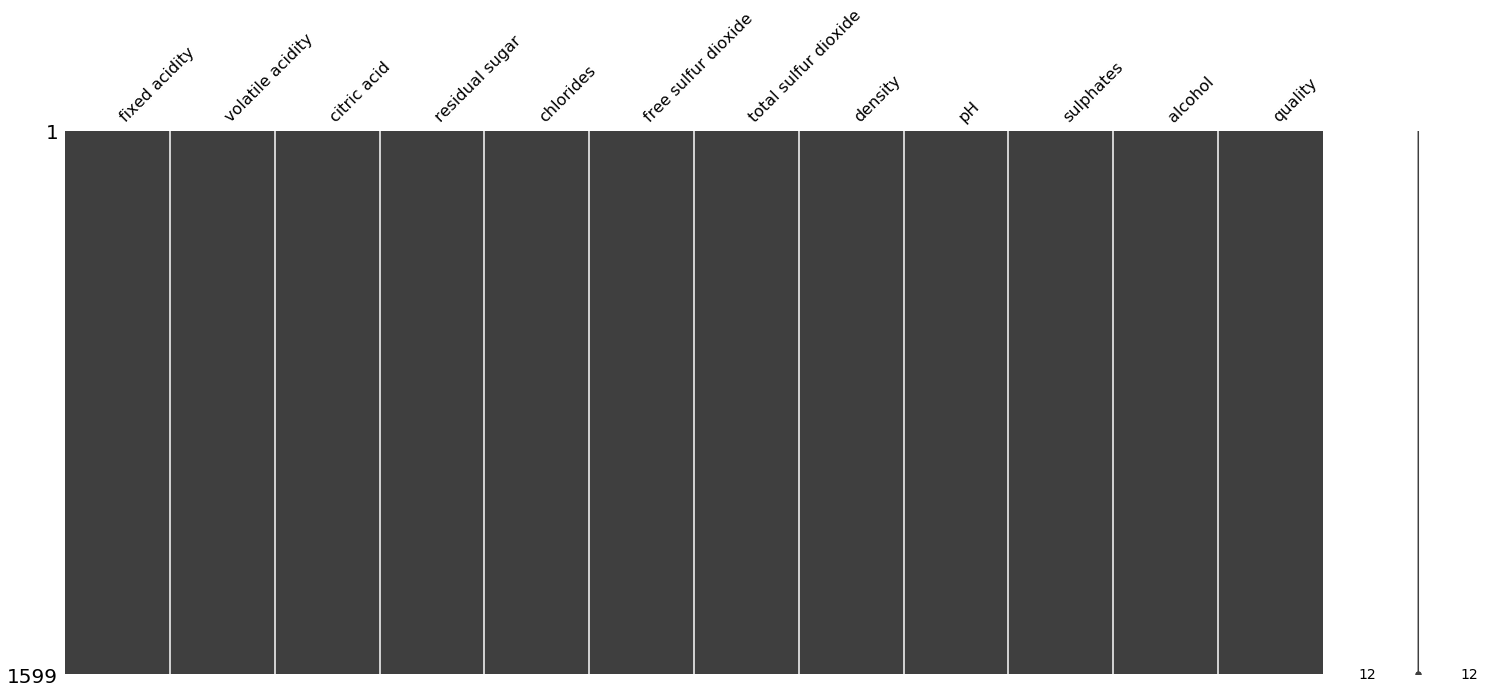

In [74]:
msno.matrix(wine)

In [75]:
# bar chart for showing null value.

In [76]:
# Now, let's check the information about different variables/column from the dataset:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


-  No Missing value or null vale in the data set  
-  All Feature coulmns having floating values and target variable having the integer values.

>### Stastical information for Dataset

In [77]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


- The summary of Red Wine dataset looks perfect, there is no visible abnormality in data (invalid/negative values).
- All the data seems to be in range (with different scales, which needs standardization).

>### Learn about Target Vector(Output coloumn)

-  Find unique value in reponse variable

In [78]:
wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

- Distributation of Unique values

In [79]:
wine.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

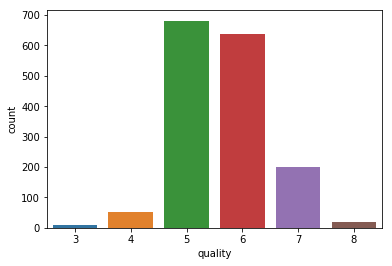

In [80]:
sns.countplot(x='quality', data=wine)

- The above distribution shows the range for response variable (_quality_) is between 3 to 8.

> ### Converting numerical value to catogorical value of Target Variables


* bad: 1-4  
* average: 5-6  
* good: 7-10

In [81]:
conditions = [
    (wine['quality'] >= 7),
    (wine['quality'] <= 4)
]
rating = ['good', 'bad']
wine['rating'] = np.select(conditions, rating, default='average')
wine.rating.value_counts()

average    1319
good        217
bad          63
Name: rating, dtype: int64

-  Bargraph Representation 

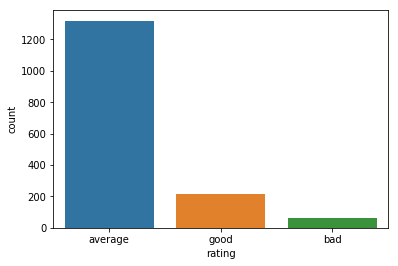

In [82]:
sns.countplot(x='rating', data=wine)


-  **Statistical analysis of Target variable**

- Find A Mean

In [83]:
wine.groupby('rating').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,5.483700
bad,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873,3.841270
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


- Find Max

In [84]:
wine.groupby('rating').max()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,15.9,1.330,0.79,15.5,0.611,72.0,165.0,1.00369,4.01,1.98,14.9,6
bad,12.5,1.580,1.00,12.9,0.610,41.0,119.0,1.00100,3.90,2.00,13.1,4
good,15.6,0.915,0.76,8.9,0.358,54.0,289.0,1.00320,3.78,1.36,14.0,8


- Find Min

In [85]:
wine.groupby('rating').min()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,4.7,0.16,0.0,0.9,0.034,1.0,6.0,0.99007,2.86,0.37,8.4,5
bad,4.6,0.23,0.0,1.2,0.045,3.0,7.0,0.99340,2.74,0.33,8.4,3
good,4.9,0.12,0.0,1.2,0.012,3.0,7.0,0.99064,2.88,0.39,9.2,7


- Find Median

In [86]:
wine.groupby('rating').median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
rating,,,,,,,,,,,,
average,7.8,0.54,0.24,2.2,0.080,14.0,40.0,0.99680,3.31,0.61,10.0,5
bad,7.5,0.68,0.08,2.1,0.080,9.0,26.0,0.99660,3.38,0.56,10.0,4
good,8.7,0.37,0.40,2.3,0.073,11.0,27.0,0.99572,3.27,0.74,11.6,7


## Step 3 : Dataset Analysis

>### Correlation between features/variables:


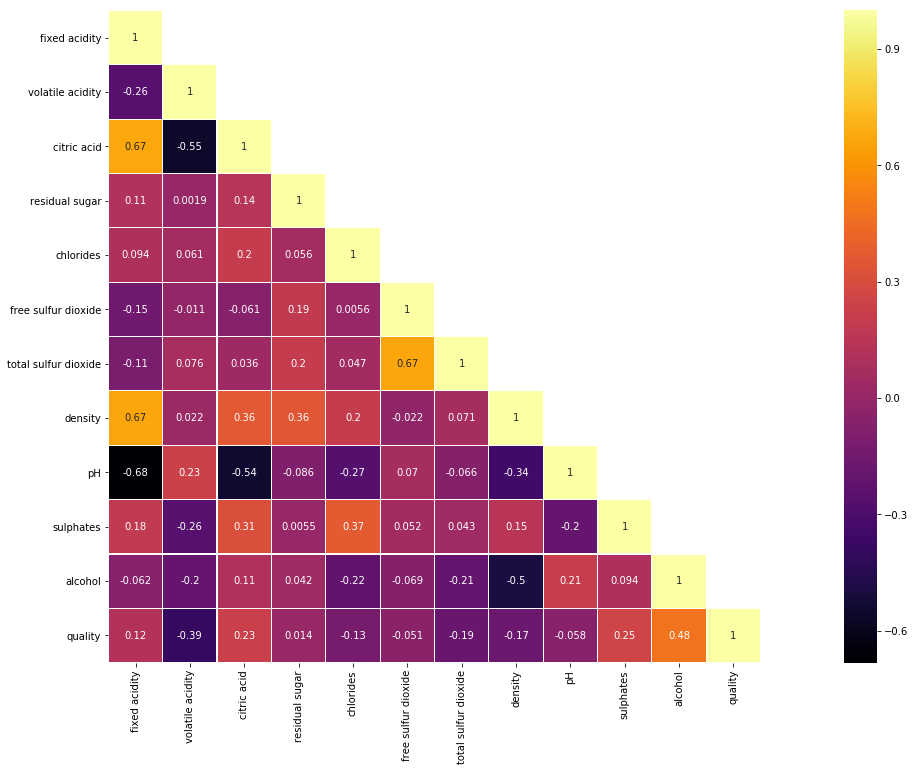

In [87]:
# correlation = wine.corr()
# plt.figure(figsize=(12, 5))
# #sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

correlation= wine.corr()
colormap = plt.cm.inferno
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=correlation ,mask=mask,square=True,annot=True,cbar=True,cmap=colormap, linecolor='White', linewidths=0.1)


In [88]:
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

### How diffrent variables(Factors) are affecting the wine Quality ?
-  Most affecting Factors :  ** Alcohol , Volatile acidity, Sulphates and Critic Acid**
-  Least affecting Factors : ** Residual sugar, Free Sulphur Dioxide and ph **

### Positive Correlated Factors: 
- Alcohol                
- Sulphates               
- Citric acid            
- Fixed acidity 

### Negative Correlated Facotrs:
- volatile acidity
- total sulfur dioxide
- density  
- chlorides 

_all the factors are in decreasing order **Most to least**_ 

####   Analysis of alcohol percentage with wine quality:

[Text(0,0.5,'Alcohol Percent'),
 Text(0.5,0,'Wine Quality'),
 Text(0.5,1,'Alcohol percent in different wine quality types')]

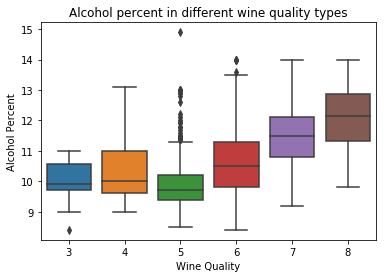

In [89]:
bx = sns.boxplot(x="quality", y='alcohol', data = wine)
bx.set(xlabel='Wine Quality', ylabel='Alcohol Percent', title='Alcohol percent in different wine quality types')

[Text(0,0.5,'alcohol'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'alcohol in different types of Wine Rating')]

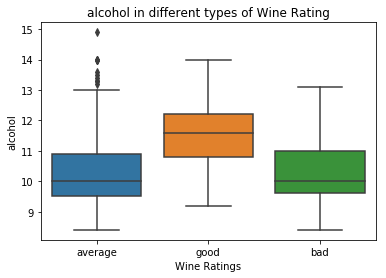

In [90]:
bx = sns.boxplot(x="rating", y='alcohol', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='alcohol', title='alcohol in different types of Wine Rating')

- Good Wine contain more alcohol.

#### Analysis of sulphates & wine ratings:

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine quality'),
 Text(0.5,1,'Sulphates in different types of Wine quality')]

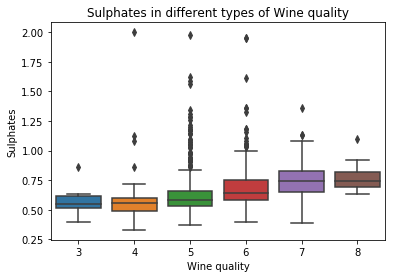

In [91]:
bx = sns.boxplot(x="quality", y='sulphates', data = wine)
bx.set(xlabel='Wine quality', ylabel='Sulphates', title='Sulphates in different types of Wine quality')

[Text(0,0.5,'Sulphates'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Sulphates in different types of Wine ratings')]

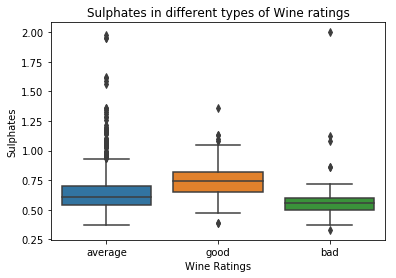

In [92]:
bx = sns.boxplot(x="rating", y='sulphates', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Sulphates', title='Sulphates in different types of Wine ratings')

#### Analysis of Citric Acid & wine ratings:

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine quality'),
 Text(0.5,1,'citric acid in different types of Wine quality')]

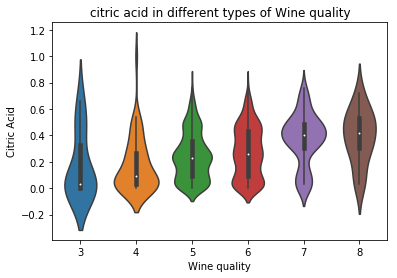

In [93]:
bx = sns.violinplot(x="quality", y='citric acid', data = wine)
bx.set(xlabel='Wine quality', ylabel='Citric Acid', title='citric acid in different types of Wine quality')

[Text(0,0.5,'Citric Acid'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'citric acid in different types of Wine ratings')]

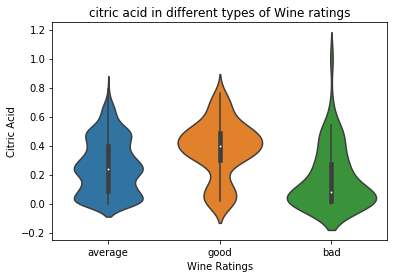

In [94]:
bx = sns.violinplot(x="rating", y='citric acid', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Citric Acid', title='citric acid in different types of Wine ratings')

#### Analysis of fixed acidity & wine ratings:

[Text(0,0.5,'Fixed Acidity'),
 Text(0.5,0,'Wine quality'),
 Text(0.5,1,'Fixed Acidity in different types of Wine quality')]

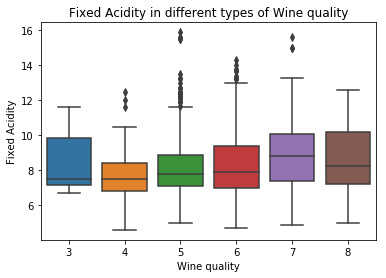

In [95]:
bx = sns.boxplot(x="quality", y='fixed acidity', data = wine)
bx.set(xlabel='Wine quality', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine quality')

[Text(0,0.5,'Fixed Acidity'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'Fixed Acidity in different types of Wine ratings')]

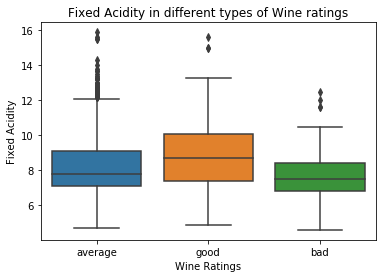

In [96]:
bx = sns.boxplot(x="rating", y='fixed acidity', data = wine)
bx.set(xlabel='Wine Ratings', ylabel='Fixed Acidity', title='Fixed Acidity in different types of Wine ratings')

#### Analysis of pH & wine ratings:

[Text(0,0.5,'pH'),
 Text(0.5,0,'Wine quality'),
 Text(0.5,1,'pH in different types of Wine quality')]

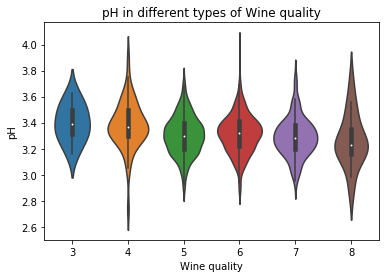

In [97]:
bx = sns.violinplot(x="quality", y="pH", data = wine);
bx.set(xlabel='Wine quality', ylabel='pH', title='pH in different types of Wine quality')

[Text(0,0.5,'pH'),
 Text(0.5,0,'Wine Ratings'),
 Text(0.5,1,'pH in different types of Wine ratings')]

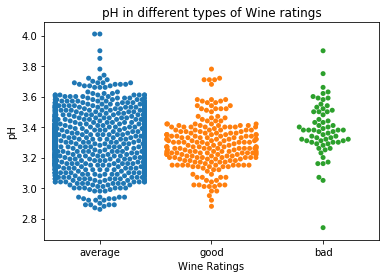

In [98]:
bx = sns.swarmplot(x="rating", y="pH", data = wine);
bx.set(xlabel='Wine Ratings', ylabel='pH', title='pH in different types of Wine ratings')

### Linear Regression:
- Below graphs for different quality ratings shows a linear regression between residual_sugar & alcohol in red wine,

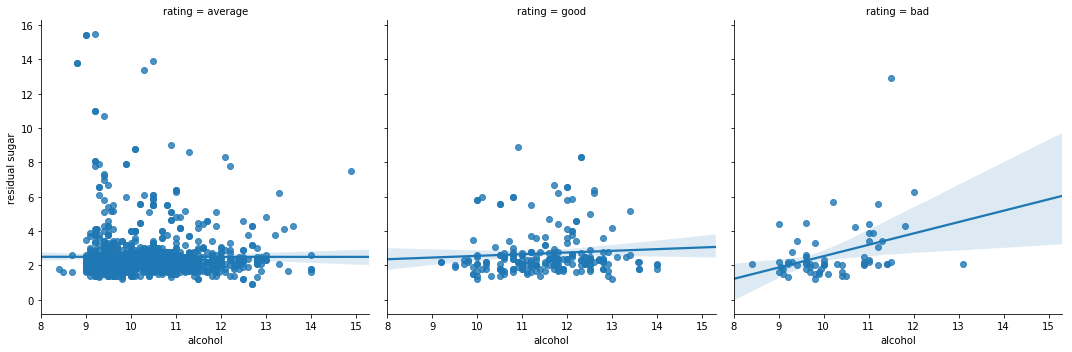

In [99]:
sns.lmplot(x = "alcohol", y = "residual sugar", col = "rating", data = wine)

- The linear regression plots above for different wine quality ratings (bad, average & good) shows the regression between alcohol and residual sugar content of the red wine.  
- We can observe from the trendline that, for good and average wine types the residual sugar content remains almost constant irrespective of alcohol content value. Whereas for bad quality wine, the residual sugar content increases gradually with the increase in alcohol content.  
- This analysis can help in manufacturing the good quality wine with continuous monitoring and contrilling the alcohol and residual sugar content of the red wine.

## Step 4: Apply Different Classifications on Dataset

In [100]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average


### Now we devide wine qulaity in label vector 1(good) and 0(bad)
 - 1 (good) quality >= 6.5
 - 0 (bad) quality < 6.5


In [101]:
def label_vector_design(x):
    if x >= 6.5:
        return 1
    elif x < 6.5 :
        return 0
wine['label'] = wine['quality'].apply(label_vector_design)

In [102]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,average,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,average,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,average,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,average,0


In [103]:
X = wine.drop(['quality', 'rating', 'label'], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [104]:
y = wine['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=42)

#Accuracy 
Accuracy = [ ]

classifiers=[LogisticRegression(),KNeighborsClassifier(),
             RandomForestClassifier(random_state=41),DecisionTreeClassifier(random_state=42),]
classifiers_names=['LogisticRegression','KNearestNeighbors','RandomForestClassifier','DecisionTree']

result={}

for classifier  in range(len(classifiers)):
    c=classifiers[classifier]
    c.fit(X_train,y_train)
    y_predict=c.predict(X_test)
    Accuracy.append(accuracy_score(y_predict,y_test))
     
result={'Classifiers Algorithm':classifiers_names,'Accuracy':Accuracy}

Accuracy_frame=pd.DataFrame(result)
Accuracy_frame

,Classifiers Algorithm,Accuracy
0,LogisticRegression,0.8775
1,KNearestNeighbors,0.8625
2,RandomForestClassifier,0.9050
3,DecisionTree,0.8825


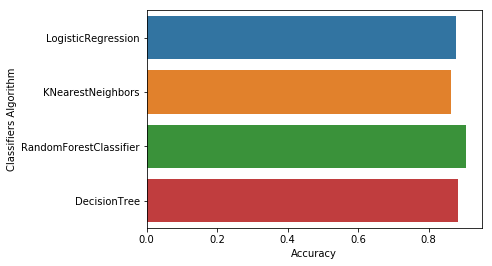

In [111]:
sns.barplot(y='Classifiers Algorithm',x='Accuracy',data=Accuracy_frame)

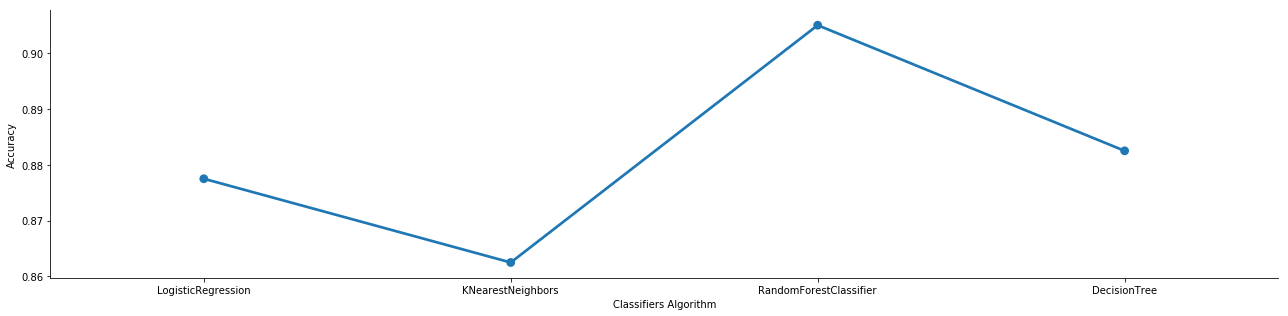

In [112]:
sns.factorplot(x='Classifiers Algorithm',y='Accuracy',data=Accuracy_frame,kind='point',size=4.5,aspect=4)

> ## Scaling the Feature Data 

In [113]:
X_Scaled = preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)
X_Scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled, y, test_size=0.25, random_state=42)

#Accuracy 
Accuracy_Scaled = [ ]

classifiers=[LogisticRegression(),KNeighborsClassifier(),
             RandomForestClassifier(random_state=41),DecisionTreeClassifier(random_state=42),]
classifiers_names=['LogisticRegression','KNearestNeighbors','RandomForestClassifier','DecisionTree']

result_normalized={}

for classifier  in range(len(classifiers)):
    c=classifiers[classifier]
    c.fit(X_train,y_train)
    y_predict=c.predict(X_test)
    Accuracy_Scaled.append(accuracy_score(y_predict,y_test))
     
result_normalized={'Classifiers Algorithm':classifiers_names,'Accuracy_Scaled':Accuracy_Scaled}

Accuracy_frame_Normalized=pd.DataFrame(result_normalized)
Accuracy_frame_Normalized


,Classifiers Algorithm,Accuracy_Scaled
0,LogisticRegression,0.8775
1,KNearestNeighbors,0.8950
2,RandomForestClassifier,0.9050
3,DecisionTree,0.8825
